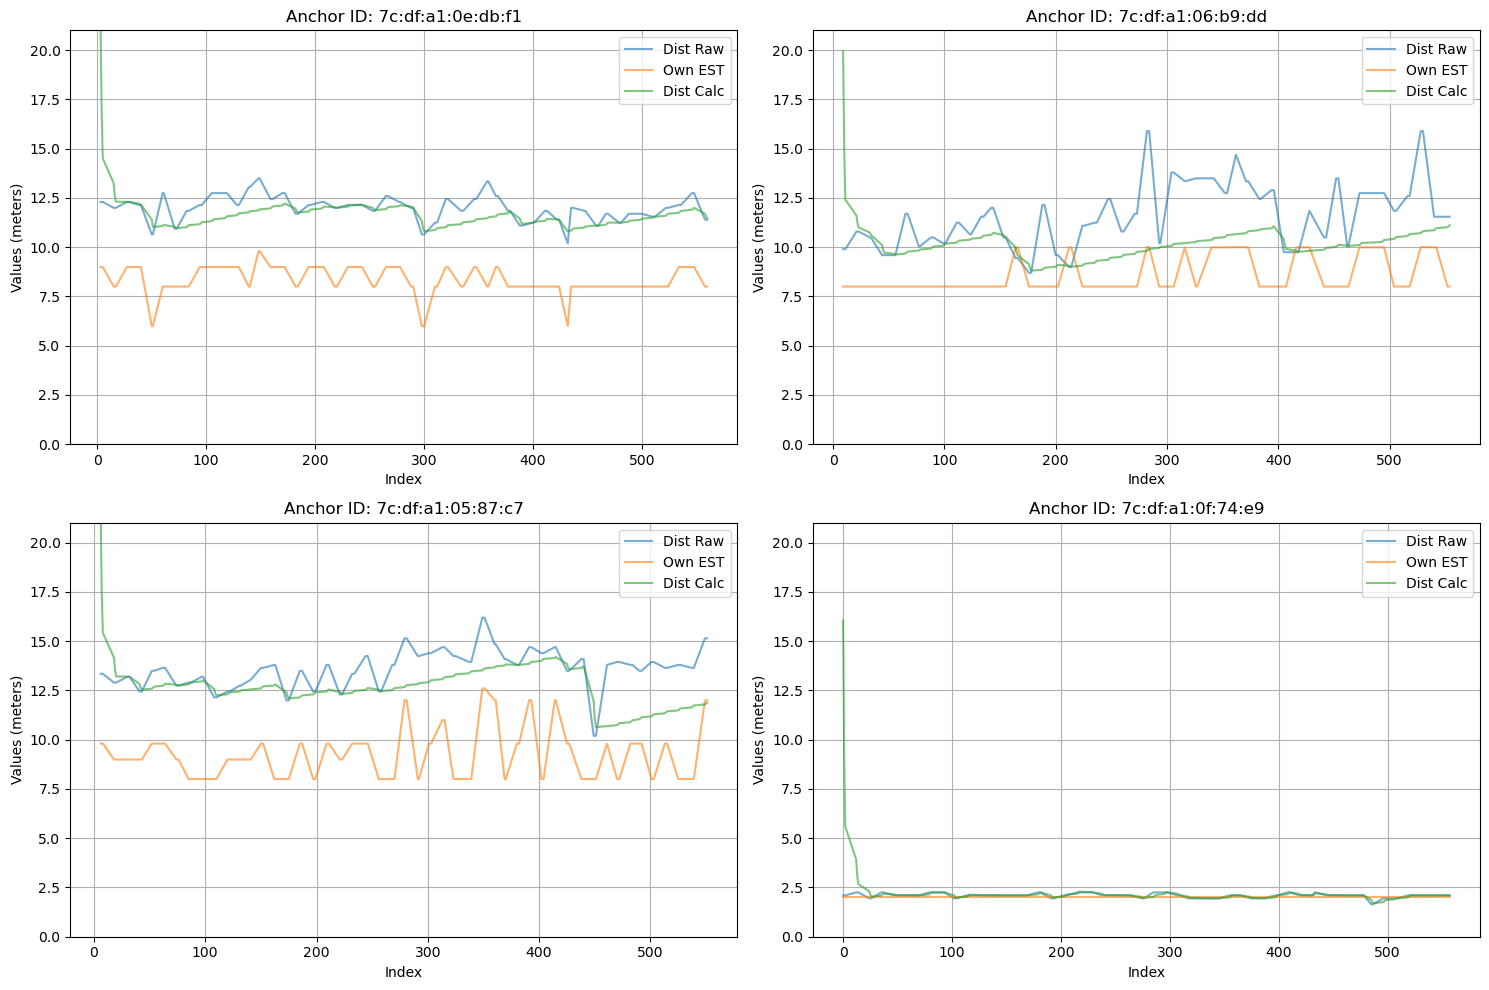

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math

# Find all CSV files in directory
csv_file = 'ac/19.csv'
data = pd.read_csv(csv_file)

rawnano2m = 0.299792458 / 2

n_cols = 2
n_rows = 2

# Create figure with subplots
fig = plt.figure(figsize=(15, 5*n_rows))
plt.subplots_adjust(hspace=0.4)

unique_ids = ['7c:df:a1:0e:db:f1', '7c:df:a1:06:b9:dd', 
    '7c:df:a1:05:87:c7', '7c:df:a1:0f:74:e9']

# Process each CSV file
for id in unique_ids:
    
    data_id = data[data['anchorId'] == id].copy()
    valor = 30.0
  
    for index, row in data_id.iterrows():
        dist = row['rtt_raw'] * rawnano2m
        if dist > valor:
            valor = valor + 0.05
        else:
            valor = valor - (valor - dist) * 0.5
        data_id.at[index, 'dist_calc'] = valor

    # Create subplot
    ax = fig.add_subplot(n_rows, n_cols, unique_ids.index(id) + 1)
    
    # Plot data
    ax.plot(data_id.index, data_id['rtt_raw'] * rawnano2m, label='Dist Raw', alpha=0.6)
    ax.plot(data_id.index, data_id['own_est'], label='Own EST', alpha=0.6)
    ax.plot(data_id.index, data_id['dist_calc'], label='Dist Calc', alpha=0.6)

    # Set y-axis limit to 30m
    ax.set_ylim(0, 21)

    # Add labels and title
    ax.set_title(f'Anchor ID: {id}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values (meters)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()